In [67]:
#ensembling
from mlxtend.classifier import StackingCVClassifier
import numpy as np
import pandas as pd
import sys, os, glob
import imp
import seaborn as sns
sys.path.append('./src/')
import my_ensembler, feature_utils, defines, model_utils
from sklearn.neighbors import KNeighborsClassifier
from sklearn_crfsuite import scorers, CRF
from sklearn.pipeline import Pipeline
import json
import common_utils

In [68]:
imp.reload(model_utils)
model_utils.add_sent_to_docs_map(dir_name,docs_map)

In [90]:
def my_fit_and_score(
    estimator_pipe,
    docs_map,
    scorer,
    train_idx,
    test_idx):
    
    result = {}
    X_train,y_train = estimator_pipe.named_steps['preprocessor'].fit_transform(docs_map,train_idx)
    X_test,y_test = estimator_pipe.named_steps['preprocessor'].fit_transform(docs_map,test_idx)
    test_scores = estimator_pipee.named_steps['classifier'].fit(X_train)
    test_scores = estimator_pipee.named_steps['classifier'].score(X_test,y_test)
    result["test_scores"] = test_scores
    return results

In [ ]:
class ByDocFold:
    def __init__(self, n_splits=3):
        self.n_splits = n_splits

    def split(self, X, y, groups=None):
        doc_indices = set(groups)
        doc_count = len(doc_indices)
        test_count = int(defines.TEST_PERSENT * doc_count)
        for i in range(self.n_splits):
            test_docs = set(random.sample(doc_indices, test_count))
            train_docs = doc_indices - test_docs
            train_idx = [i for i, j in enumerate(groups) if j in train_docs]
            test_idx = [i for i, j in enumerate(groups) if j in test_docs]
            yield train_idx, test_idx

    def get_n_splits(self, X, y, groups=None):
        return self.n_splits

In [70]:
best_params_crf

{'algorithm': 'lbfgs',
 'c1': 0.5052489623208797,
 'c2': 0.03723629092212718,
 'linesearch': 'MoreThuente',
 'min_freq': 9}

In [72]:
crf = CRF(
    **best_params_crf,
    max_iterations=100,
    all_possible_transitions=True,
)

In [83]:
imp.reload(model_utils)
crf_preprocess = model_utils.CrfTransformer(seq_len,step)


>>>>>>>init() called.



In [84]:
crf_pipe= Pipeline(steps=[('preprocessor', crf_preprocess), ('classifier', crf)])

In [88]:
crf_preprocess.fit_transform(X=docs_map,indices=np.arange(1,70))


>>>>>>>fit() called.


>>>>>>>transform() called.



TypeError: 'NoneType' object is not iterable

In [ ]:
y = df1.index
x = preprocessing.scale(df1)

phy_features = ['A', 'B', 'C']
phy_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
phy_processer = ColumnTransformer(transformers=[('phy', phy_transformer, phy_features)])

fa_features = ['D', 'E', 'F']
fa_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
fa_processer = ColumnTransformer(transformers=[('fa', fa_transformer, fa_features)])


pipe_phy = Pipeline(steps=[('preprocessor', phy_processer ),('classifier', SVM)])
pipe_fa = Pipeline(steps=[('preprocessor', fa_processer ),('classifier', SVM)])

ens = VotingClassifier(estimators=[pipe_phy, pipe_fa])

cv = KFold(n_splits=10, random_state=None, shuffle=True)
for train_index, test_index in cv.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ens.fit(x_train,y_train)
    print(ens.score(x_test, y_test))

In [65]:
docs_map[1].keys()

dict_keys(['X', 'y', 'groups', 'X_3_3', 'y_3_3', 'groups_3_3', 'text'])

In [ ]:
cv = ByDocFold()
for train_index, test_index in cv.split(x):
    x_train_crf, y_train_crf,_ = model_utils.get_X_y_by_doc_indices(docs_map,train_idx,seq_len,step)
    x_test_crf, y_test_crf,_ = model_utils.get_X_y_by_doc_indices(docs_map,test_index,seq_len,step)

    x_train_crf, y_train_crf,_ = model_utils.get_X_y_by_doc_indices(docs_map,train_idx,seq_len,step)
    x_test_crf, y_test_crf,_ = model_utils.get_X_y_by_doc_indices(docs_map,test_index,seq_len,step)
    
    y_train, y_test = y[train_index], y[test_index]
    ens.fit(x_train,y_train)
    print(ens.score(x_test, y_test))

In [35]:
tr,ts=model_utils.get_test_train_idx(docs_map,0.2,seed=42)

In [41]:
imp.reload(model_utils)
y_test = model_utils.get_y_by_doc_indices(docs_map,tr,seq_len,step)

In [42]:
y_test

[['not_nar', 'not_nar', 'not_nar'],
 ['not_nar', 'not_nar', 'is_nar', 'is_nar'],
 ['is_nar', 'is_nar', 'is_nar'],
 ['not_nar', 'not_nar', 'not_nar'],
 ['not_nar', 'is_nar', 'is_nar', 'is_nar', 'is_nar'],
 ['is_nar', 'is_nar', 'is_nar', 'not_nar'],
 ['not_nar', 'not_nar', 'not_nar', 'not_nar'],
 ['not_nar', 'not_nar', 'not_nar', 'not_nar', 'not_nar', 'not_nar', 'not_nar'],
 ['not_nar', 'not_nar', 'not_nar', 'not_nar'],
 ['not_nar', 'not_nar', 'not_nar', 'not_nar', 'not_nar'],
 ['is_nar', 'is_nar', 'is_nar', 'is_nar', 'is_nar', 'is_nar'],
 ['is_nar', 'is_nar', 'is_nar', 'is_nar'],
 ['is_nar', 'is_nar', 'is_nar', 'is_nar'],
 ['is_nar', 'not_nar', 'is_nar', 'is_nar', 'is_nar', 'is_nar', 'is_nar'],
 ['is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar',
  'is_nar'],
 ['not_nar', 'not_nar', 'not_nar', 'not_nar', 'not_nar'],
 ['not_nar', 'not_nar', 'not_nar', 'not_nar', 'not_nar', 'not_nar'],
 ['not_nar', 'not_nar', 'not_nar', 'not_nar'],
 [

In [43]:
imp.reload(model_utils)
seq_len=3
step=3
crf_transformer = model_utils.CrfTransformer(seq_len,step,dir_name)
crf_clf=CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True)
crf_pipe = Pipeline(steps=[('transformer', crf_transformer ),('classifier', crf_clf)])
crf_pipe.fit(tr,y_test)


>>>>>>>init() called.


>>>>>>>fit() called.


>>>>>>>transform() called.



Pipeline(steps=[('transformer',
                 CrfTransformer(dir_name='recalc_tfidf', seq_len=3, step=3)),
                ('classifier',
                 CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1,
                     c2=0.1, max_iterations=100))])

In [24]:
docs_map

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    [
    ('crf', 
      crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True,
    )),
#      ('alephbert',
#       #loadmodel
#      ),
#         ('hebert',
#         #loadmodel
#         )
    ('knn', KNeighborsClassifier())
    ],
    voting='soft')
voting.fit(X_train, y_train)
lr, tree = voting.estimators_
tree.score(X_test, y_test), lr.score(X_test, y_test), voting.score(X_test, y_test)

### Prepare data for KNN

In [38]:
def concat_vectors(dim = 300):
    X_vec = pd.DataFrame()
    y_vec = pd.Series(dtype=int)
    doc_list = glob.glob(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"*_sent_vec{}_db.csv".format(dim)))
    doc_list.sort()
    for i,doc in enumerate(doc_list):
        doc_idx = feature_utils.get_doc_idx_from_name(doc)
        sent_vec_db = pd.read_csv(doc)
        sent_db =  pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_sent_db.csv".format(doc_idx)),usecols=['is_nar'])
        y_vec = pd.concat([y_vec,sent_db['is_nar']],ignore_index=True)
        X_vec = pd.concat([X_vec,sent_vec_db],ignore_index=True)
    return X_vec,y_vec

In [39]:
X_vec,y_vec =concat_vectors()

In [40]:
X_vec

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.029905,0.038024,0.000409,-0.002114,-0.001024,-0.023301,0.052745,0.006430,-0.046377,0.020095,...,0.014652,0.000285,-0.035123,-0.030111,-0.027191,0.026381,0.005289,0.005408,-0.020530,0.001053
1,0.044579,0.024742,0.028893,-0.060388,0.039829,0.025243,-0.117620,-0.028324,0.013425,-0.002992,...,0.009427,0.038958,-0.027126,-0.003454,-0.037883,0.018410,0.046375,0.052125,-0.023152,0.060160
2,-0.085588,0.067969,0.007988,0.032841,-0.052474,-0.082648,0.003187,0.004346,-0.054798,0.033916,...,0.015144,0.047520,0.017374,0.017066,-0.094182,-0.041293,-0.041231,-0.052368,0.037051,-0.036378
3,-0.114521,0.000108,0.036471,-0.024207,0.002051,0.014730,-0.104159,0.058651,0.005404,0.056529,...,-0.028992,0.024537,-0.002414,0.039244,-0.094238,0.025045,0.097398,-0.004409,0.041561,-0.049388
4,0.036749,0.012629,-0.027156,-0.004715,-0.005032,0.006106,-0.031141,-0.070769,-0.020561,0.019293,...,0.034837,-0.046828,0.011486,-0.009508,-0.058013,0.021407,-0.048019,-0.067683,-0.061374,-0.075125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33231,0.000403,0.030761,0.006861,0.004358,0.004020,-0.034013,-0.000644,0.006724,-0.025179,0.023791,...,-0.004880,0.018460,-0.012988,-0.015199,0.007455,0.018707,0.010102,0.018673,-0.018850,-0.015083
33232,0.005242,0.025412,0.033902,0.024731,-0.006604,0.030173,-0.049072,0.008212,-0.030461,-0.011216,...,0.003355,-0.001061,-0.019386,0.016321,-0.066378,0.016374,0.000689,0.015705,0.017209,0.015820
33233,-0.000916,0.064209,-0.006212,-0.010558,-0.056428,-0.062275,-0.031020,0.041746,-0.062375,0.090405,...,-0.031854,-0.019589,-0.008862,0.013844,-0.076933,-0.032281,-0.060818,-0.041205,-0.029383,-0.056909
33234,0.048067,0.013103,-0.032234,-0.009326,-0.017668,-0.028665,0.105883,-0.009100,-0.036032,-0.006796,...,-0.016274,-0.000202,0.001330,0.031665,-0.035877,0.018119,0.033564,-0.041964,-0.011305,0.029903


In [41]:
y_vec

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
33231    0.0
33232    0.0
33233    0.0
33234    0.0
33235    0.0
Length: 33236, dtype: float64

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vec, y_vec, test_size=0.33, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
y_pred = knn.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.74      0.86      0.80      7570
         1.0       0.52      0.33      0.40      3398

    accuracy                           0.70     10968
   macro avg       0.63      0.60      0.60     10968
weighted avg       0.67      0.70      0.67     10968



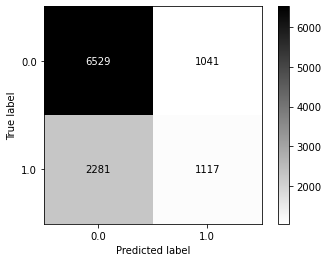

In [47]:
feature_utils.get_prediction_report(y_test,y_pred,knn.classes_)

In [ ]:
estimators={}
estimators['crf'] = {}
estimators['crf']['mod'] = 

In [ ]:
crf=estimators['crf']['mod']
alephbert=estimators['alephbert']['mod']
hebert=estimators['hebert']['mod']

In [ ]:
classifiers = [crf,alephbert,hebert]
scv=my_ensembler.ensemble()

# scv.fit(X_train,y_train)
# scv_predicted = scv.predict(X_test)
# scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
# scv_acc_score = accuracy_score(y_test, scv_predicted)
# print("confussion matrix")
# print(scv_conf_matrix)
# print("\n")
# print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
# print(classification_report(y_test,scv_predicted))

# Manual ensemble crf + BERT

In [48]:
import imp, model_utils, feature_utils, my_bert, common_utils
from transformers import BertModel, BertTokenizerFast
from sklearn_crfsuite import scorers, CRF
from sklearn_crfsuite.utils import flatten
import pandas as pd

In [8]:
doc_map_path =  os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"docs_map.json")
with open(doc_map_path, 'r') as fp:
    docs_map = json.load(fp)

In [244]:
test_docs

[4, 69, 70, 72, 12, 13, 14, 78, 18, 27, 28, 29]

In [58]:
docs_map = {int(k):v for k,v in docs_map.items()}

### Load test docs that BERT has not seen yet

In [314]:
all_docs = [int(i) for i in docs_map.keys()]
all_docs = set(all_docs)
train_docs = all_docs - set(test_docs)
len(train_docs)

68

In [71]:
import json, os, sys, numpy as np
sys.path.append('./src/')
import defines
dir_name="recalc_tfidf"
json_path = os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"test_doc_indices.json")
with open(json_path, 'r') as fp:
    test_docs = json.load(fp)

#### Prepare tested docs for input to CRF

In [257]:
imp.reload(model_utils)
seq_len=3
step=3
per_par=True
feature_utils.reshape_docs_map_to_seq(docs_map,per_par,seq_len,step)
X_test,y_test,groups_test = model_utils.get_X_y_by_doc_indices(docs_map,test_docs,seq_len,step)
train_docs = set(docs_map.keys()) - set(test_docs)
X_train,y_train,groups_train = model_utils.get_X_y_by_doc_indices(docs_map,train_docs,seq_len,step)

[68] 439 -> 147 [57] 271 -> 91 [42] 136 -> 46 [63] 338 -> 113 [76] 132 -> 44 [49] 206 -> 69 [21] 108 -> 36 [34] 49 -> 17 [15] 121 -> 41 [39] 111 -> 37 [13] 90 -> 30 [6] 420 -> 140 [27] 67 -> 23 [32] 73 -> 25 [18] 62 -> 21 [65] 335 -> 112 [70] 183 -> 61 [51] 208 -> 70 [44] 199 -> 67 [48] 223 -> 75 [62] 248 -> 83 [77] 176 -> 59 [56] 268 -> 90 [43] 99 -> 33 [69] 517 -> 173 [14] 129 -> 43 [1] 203 -> 68 [20] 90 -> 30 [35] 63 -> 21 [19] 265 -> 89 [26] 114 -> 38 [33] 91 -> 31 [12] 150 -> 50 [7] 248 -> 83 [38] 90 -> 30 [50] 184 -> 62 [45] 204 -> 68 [64] 347 -> 116 [71] 156 -> 52 [2] 156 -> 52 [17] 322 -> 108 [28] 167 -> 56 [80] 223 -> 75 [9] 276 -> 92 [36] 87 -> 29 [23] 74 -> 25 [74] 95 -> 32 [61] 433 -> 145 [40] 148 -> 50 [55] 249 -> 83 [46] 200 -> 67 [53] 149 -> 50 [79] 172 -> 58 [58] 384 -> 128 [72] 420 -> 140 [67] 407 -> 136 [30] 82 -> 28 [25] 122 -> 41 [4] 132 -> 44 [11] 121 -> 41 [37] 99 -> 33 [22] 89 -> 30 [8] 82 -> 28 [29] 105 -> 35 [3] 113 -> 38 [16] 102 -> 34 [41] 137 -> 46 [54] 243 

In [59]:
imp.reload(common_utils)
common_utils.get_random_sample(docs_map)

[{'is_question': 0.0,
  'par_idx_in_doc': 27.0,
  'sent_len': 33.0,
  'is_client': 1,
  'sent_idx_in_par': 0,
  'sent_pos_in_par': 0.3333333333333333,
  'sent_pos_in_doc': 0.1267605633802817,
  'TOKEN': 8,
  'POSTAG_BN': 0.125,
  'POSTAG_CC': 0.25,
  'POSTAG_PRP': 0.125,
  'POSTAG_RB': 0.5,
  'f_gen_M': 0.25,
  'f_num_S': 0.25,
  'f_per_1': 0.125,
  'f_per_A': 0.125,
  'sent_idx': 53,
  '-1:is_question': 0.0,
  '-1:par_idx_in_doc': 26.0,
  '-1:sent_len': 2.0,
  '-1:is_client': 0,
  '-1:sent_idx_in_par': 1,
  '-1:sent_pos_in_par': 1.0,
  '-1:sent_pos_in_doc': 0.1244131455399061,
  '-1:TOKEN': 1,
  '-1:POSTAG_NNP': 1.0,
  '-1:f_gen_M': 1.0,
  '-1:f_num_S': 1.0,
  '+1:is_question': 0.0,
  '+1:par_idx_in_doc': 27.0,
  '+1:sent_len': 56.0,
  '+1:is_client': 1,
  '+1:sent_idx_in_par': 1,
  '+1:sent_pos_in_par': 0.6666666666666666,
  '+1:sent_pos_in_doc': 0.1291079812206572,
  '+1:TOKEN': 12,
  '+1:POSTAG_BN': 0.0833333333333333,
  '+1:POSTAG_CC': 0.1666666666666666,
  '+1:POSTAG_COP': 0.1666

In [63]:
docs_map[1]['text']

['אז היום אנחנו נפגשים פה ב18 אבל שבוע הבא בחמישי',
 'כן',
 'אוקיי מה שלומך?',
 'ברוך השם',
 'מחר יש לכם יום טיול',
 'כן',
 'מה אתם עושים?',
 'אה נוסעים ליערות הכרמל',
 'שזה יום כזה',
 'אה',
 'כן היום זה עובד ככה שפונים לחברות שעושות את כל הדברים האלה כבר',
 'מארגנות הכל אז יש שם פעילויות יש יום',
 'כן זה מן מלון ספא כזה נכון?',
 'משהו כזה',
 'לא ליערות הכרמל כן יש שם גם את זה אבל אנחנו נוסעים אה רגע יכול להיות שלא קוראים לזה יערות הכרמל?',
 'כן איפה שהיה השריפה',
 'כן',
 'אבל שמה יש איזה יום שאנחנו נעשה פעילויות וזה',
 'לא במלון',
 'אה גם למלון אני חושב קוראים יערות הכרמל חשבתי לזה התכוונת',
 'כן וזה בא בדיוק בתקופה',
 'אנחנו עכשיו בחברה בגלל שיש את כל הצמצומים אז חלק מהחברה החברה הרי עברו עם משרדים וחלק השכירו לחברה אחרת והתכנון היה שבעתיד אנחנו נגדל ככה שנגיד לחברה הזאת ביי ביי ונכנס לשטח הזה',
 'מה שקרה זה שהגלגל התהפך והחברה במצב לא משהו אז והם גדלו החברה השנייה אז איפה שאני ישבתי המחלקה שלי אנחנו בעצם סוגרים אותה ונותנים את השטח הזה משכירים את השטח הזה לחברה השנייה בעצם כדי לחסוך

#### Prepare tested docs for imput to BERT

In [258]:
sent_db = common_utils.concat_dbs(dir_name,"sent_db",['text','is_nar'])

In [259]:
imp.reload(my_bert)
alephbert_tokenizer = BertTokenizerFast.from_pretrained('onlplab/alephbert-base')
test_text, test_labels = my_bert.get_text_label_by_doc(sent_db,test_docs)
test_tokens = my_bert.get_test_tokens(alephbert_tokenizer,test_text)
tensor_map = my_bert.covert_test_token2tensor(test_tokens,test_labels)

/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


#### Load pre-trained BERT model

In [260]:
model_name = "alephbert"
alephbert = BertModel.from_pretrained('onlplab/alephbert-base', return_dict=False)
wrapped_model = my_bert.wrap_pretained_model(alephbert)
saved_model = my_bert.load_saved_bert_model(wrapped_model,model_name)

Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Instance CRF with selected parameters

In [69]:
json_path = os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"best_params_lemma.word_docFoldCv_2.json")

with open(json_path, 'r') as fp:
    best_params_crf = json.load(fp)
best_params_crf

{'algorithm': 'lbfgs',
 'c1': 0.5052489623208797,
 'c2': 0.03723629092212718,
 'linesearch': 'MoreThuente',
 'min_freq': 9}

In [262]:
crf = CRF(
    **best_params_crf,
    max_iterations=100,
    all_possible_transitions=True,
)
crf.fit(X_train,y_train)
crf

CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.5052489623208797,
    c2=0.03723629092212718, linesearch='MoreThuente', max_iterations=100,
    min_freq=9)

In [263]:
def get_pred_label_from_prob(df):
    return "not_nar" if df['avg_prob_0']>df['avg_prob_1'] else "is_nar"

In [299]:
imp.reload(my_bert)
imp.reload(model_utils)

def ensemble_predictions(crf_model,x_test_crf,bert_model,x_test_bert,weights):
    pred_df = pd.DataFrame()
    bert_label, bert_proba = my_bert.get_prediction(bert_model,x_test_bert)
    crf_label = flatten(crf_model.predict(x_test_crf))
    crf_proba = model_utils.get_predicted_prob_from_dict(flatten(crf_model.predict_marginals(x_test_crf)))
    pred_df['bert'] = ['not_nar' if i ==0 else 'is_nar' for i in bert_label]
    pred_df['crf'] = crf_label
    pred_df['bert_proba_0']=bert_proba[:,0]
    pred_df['bert_proba_1']=bert_proba[:,1]
    pred_df['crf_proba_0']=crf_proba[:,0]
    pred_df['crf_proba_1']=crf_proba[:,1]
    probas = np.asarray([crf_proba,bert_proba])
    avg = np.average(
                probas, axis=0, weights=weigths
            )
    pred_df['avg_prob_0'] = avg[:,0]
    pred_df['avg_prob_1'] = avg[:,1]
    pred_df['voted_label'] = pred_df[['avg_prob_0','avg_prob_1']].idxmax(axis=1)
    pred_df['voted_label'].replace('avg_prob_0','not_nar',inplace=True)
    pred_df['voted_label'].replace('avg_prob_1','is_nar',inplace=True)
    return pred_df


In [265]:
def get_predicted_prob_from_dict(y_pred_proba_flat):
    pr_arr = np.zeros((len(y_pred_proba_flat),2))
    pr_arr[:,0] = [sample['not_nar'] for sample in y_pred_proba_flat]
    pr_arr[:,1] = [sample['is_nar'] for sample in y_pred_proba_flat]
    return pr_arr

In [267]:
weights=[0.7,0.3]
pred_df = ensemble_predictions(crf,X_test,saved_model,tensor_map['test'],weights)
pred_df

,bert,crf,bert_proba_0,bert_proba_1,crf_proba_0,crf_proba_1,avg_prob_0,avg_prob_1,voted_label
0,0,not_nar,0.718448,0.281552,0.981550,0.018450,0.902619,0.097381,not_nar
1,0,not_nar,0.807705,0.192295,0.990942,0.009058,0.935971,0.064029,not_nar
2,0,not_nar,0.846506,0.153494,0.997356,0.002644,0.952101,0.047899,not_nar
3,1,is_nar,0.410462,0.589538,0.383633,0.616367,0.391682,0.608318,is_nar
4,1,is_nar,0.243487,0.756513,0.336836,0.663164,0.308831,0.691169,is_nar
...,...,...,...,...,...,...,...,...,...
6098,1,not_nar,0.421347,0.578653,0.968799,0.031201,0.804563,0.195436,not_nar
6099,0,not_nar,0.586311,0.413688,0.965671,0.034329,0.851863,0.148137,not_nar
6100,0,not_nar,0.747379,0.252621,0.952480,0.047520,0.890950,0.109050,not_nar
6101,0,not_nar,0.830255,0.169745,0.906428,0.093572,0.883576,0.116424,not_nar


BERT alone
              precision    recall  f1-score   support

     not_nar       0.69      0.57      0.63      4029
      is_nar       0.38      0.50      0.43      2074

    accuracy                           0.55      6103
   macro avg       0.53      0.54      0.53      6103
weighted avg       0.58      0.55      0.56      6103



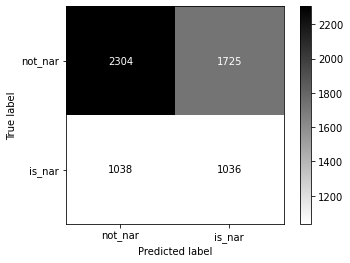

In [283]:
bert_pred = pred_df['bert'].tolist()
labels = list(crf.classes_)
bert_pred_str = ['not_nar' if i ==0 else 'is_nar' for i in bert_pred]
feature_utils.get_prediction_report(flatten(y_test),bert_pred_str,labels,"BERT alone")

CRF alone
              precision    recall  f1-score   support

     not_nar       0.85      0.92      0.89      4029
      is_nar       0.82      0.69      0.75      2074

    accuracy                           0.84      6103
   macro avg       0.84      0.81      0.82      6103
weighted avg       0.84      0.84      0.84      6103



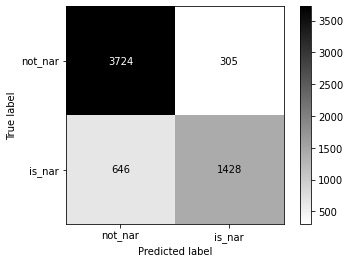

In [282]:
y_pred= pred_df['crf'].tolist()
labels = list(crf.classes_)
feature_utils.get_prediction_report(flatten(y_test),y_pred,labels,"CRF alone")

CRF 0.7 + BERT 0.3
              precision    recall  f1-score   support

     not_nar       0.86      0.92      0.89      4029
      is_nar       0.82      0.71      0.76      2074

    accuracy                           0.85      6103
   macro avg       0.84      0.81      0.82      6103
weighted avg       0.85      0.85      0.84      6103



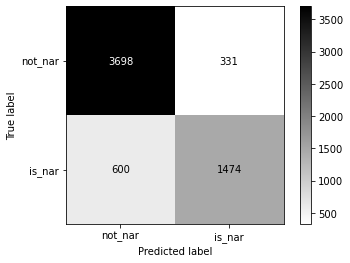

In [285]:
imp.reload(feature_utils)
y_pred= pred_df['voted_label'].tolist()
labels = list(crf.classes_)
feature_utils.get_prediction_report(flatten(y_test),y_pred,labels,"CRF {} + BERT {}".format(weights[0],weights[1]))

In [ ]:
        avg = np.average(
            self._collect_probas(X), axis=0, weights=self._weights_not_none
        )
     np.asarray([clf.predict_proba(X) for clf in self.estimators_])

In [390]:
def recalc_avg(pred_df,weights,columns):
    if len(weights)!=len(columns):
        print("ERROR: weights and columns are not the same length")
    avg_col_name = "_".join(["{}{}".format(col,we) for col,we in zip(columns,weights)])
    probas = np.asarray([pred_df[[col+'_proba_0',col+'_proba_1']] for col in columns])
    avg = np.average(
            probas, axis=0, weights=np.asarray(weights)
        )
    pred_df[avg_col_name+"_prob_0"] = avg[:,0]
    pred_df[avg_col_name+"_prob_1"] = avg[:,1]
    pred_df[avg_col_name] = pred_df[[avg_col_name+"_prob_0",avg_col_name+"_prob_1"]].idxmax(axis=1)
    pred_df[avg_col_name].replace(avg_col_name+"_prob_0",'not_nar',inplace=True)
    pred_df[avg_col_name].replace(avg_col_name+"_prob_1",'is_nar',inplace=True)
    return pred_df

In [333]:
imp.reload(my_bert)
weights=[0.8,0.2]
columns = ['bert','crf'] #'knn_proba_0']
pred_df_w = recalc_avg(pred_df,weights,columns)


bert0.8_crf0.2
              precision    recall  f1-score   support

     not_nar       0.86      0.92      0.89      4029
      is_nar       0.82      0.71      0.76      2074

    accuracy                           0.85      6103
   macro avg       0.84      0.81      0.82      6103
weighted avg       0.85      0.85      0.84      6103



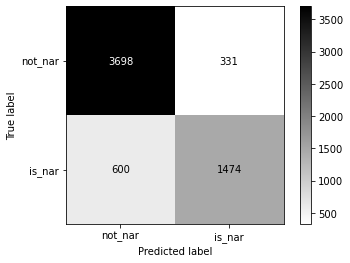

In [303]:
y_pred = pred_df_w['bert0.8_crf0.2'].tolist()
feature_utils.get_prediction_report(flatten(y_test),y_pred,labels,"bert0.8_crf0.2")

In [166]:
pred_df.to_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"ensemble_result_crf_.7_bert_0.3.csv"),index=False)

### Prepare KNN

In [304]:
vec_db = common_utils.concat_dbs(dir_name,"sent_vec300_db",[])
vec_db

,doc_idx,sent_idx,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,1,0,0.029905,0.038024,0.000409,-0.002114,-0.001024,-0.023301,0.052745,0.006430,...,0.014652,0.000285,-0.035123,-0.030111,-0.027191,0.026381,0.005289,0.005408,-0.020530,0.001053
1,1,1,0.044579,0.024742,0.028893,-0.060388,0.039829,0.025243,-0.117620,-0.028324,...,0.009427,0.038958,-0.027126,-0.003454,-0.037883,0.018410,0.046375,0.052125,-0.023152,0.060160
2,1,2,-0.063953,0.013787,0.025892,0.007249,-0.013971,-0.002442,-0.041142,0.033136,...,-0.004578,0.000866,0.004058,0.015763,-0.086529,0.006281,0.053314,-0.010198,0.013481,-0.059708
3,1,3,0.036749,0.012629,-0.027156,-0.004715,-0.005032,0.006106,-0.031141,-0.070769,...,0.034837,-0.046828,0.011486,-0.009508,-0.058013,0.021407,-0.048019,-0.067683,-0.061374,-0.075125
4,1,4,0.044400,0.038630,0.013795,0.001058,0.010705,-0.073921,0.081434,0.031412,...,0.032595,0.002161,-0.010715,-0.020413,-0.004748,0.036311,0.020303,0.030462,-0.020598,-0.003918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36319,80,486,0.020033,0.001112,0.033424,0.035781,-0.010556,0.024770,-0.003766,0.022289,...,-0.006407,0.010838,-0.034474,0.006742,-0.072404,0.004274,-0.000800,0.005430,0.013320,0.034617
36320,80,487,-0.016663,-0.002327,0.017914,0.013489,0.000392,0.015904,-0.026335,0.034737,...,-0.013125,0.013298,-0.030053,0.020856,-0.080854,0.016696,-0.019326,0.039048,0.025951,0.033396
36321,80,488,-0.028692,-0.004156,0.006693,0.002255,-0.006312,0.057422,-0.048462,0.029613,...,-0.014689,0.016053,-0.012858,0.014391,-0.091205,0.025007,-0.017743,0.038814,0.000735,0.041542
36322,80,489,-0.021776,0.005853,0.021867,0.007726,-0.010144,-0.026128,0.048582,-0.007228,...,-0.003416,-0.015227,-0.007348,0.030559,-0.013673,-0.011709,-0.009469,0.011021,-0.009502,-0.073398


In [305]:
sent_db

,doc_idx,sent_idx,text,is_nar
0,1,0,אז היום אנחנו נפגשים פה ב18 אבל שבוע הבא בחמישי,0.0
1,1,1,כן,0.0
2,1,2,אוקיי מה שלומך?,0.0
3,1,3,ברוך השם,0.0
4,1,4,מחר יש לכם יום טיול,0.0
...,...,...,...,...
36319,80,486,שאני מרגיש בהם לא נוח,0.0
36320,80,487,אז כאילו למה למה אני מתגעגע,0.0
36321,80,488,או למה אני למה אני רוצה,0.0
36322,80,489,והצלחת לענות לעצמך?,0.0


In [308]:
vec_label_db =  pd.merge(sent_db[['doc_idx','sent_idx','is_nar']],vec_db, left_on=['doc_idx','sent_idx'],right_on=['doc_idx','sent_idx'],validate="one_to_one")
vec_label_db

,doc_idx,sent_idx,is_nar,0,1,2,3,4,5,6,...,290,291,292,293,294,295,296,297,298,299
0,1,0,0.0,0.029905,0.038024,0.000409,-0.002114,-0.001024,-0.023301,0.052745,...,0.014652,0.000285,-0.035123,-0.030111,-0.027191,0.026381,0.005289,0.005408,-0.020530,0.001053
1,1,1,0.0,0.044579,0.024742,0.028893,-0.060388,0.039829,0.025243,-0.117620,...,0.009427,0.038958,-0.027126,-0.003454,-0.037883,0.018410,0.046375,0.052125,-0.023152,0.060160
2,1,2,0.0,-0.063953,0.013787,0.025892,0.007249,-0.013971,-0.002442,-0.041142,...,-0.004578,0.000866,0.004058,0.015763,-0.086529,0.006281,0.053314,-0.010198,0.013481,-0.059708
3,1,3,0.0,0.036749,0.012629,-0.027156,-0.004715,-0.005032,0.006106,-0.031141,...,0.034837,-0.046828,0.011486,-0.009508,-0.058013,0.021407,-0.048019,-0.067683,-0.061374,-0.075125
4,1,4,0.0,0.044400,0.038630,0.013795,0.001058,0.010705,-0.073921,0.081434,...,0.032595,0.002161,-0.010715,-0.020413,-0.004748,0.036311,0.020303,0.030462,-0.020598,-0.003918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36319,80,486,0.0,0.020033,0.001112,0.033424,0.035781,-0.010556,0.024770,-0.003766,...,-0.006407,0.010838,-0.034474,0.006742,-0.072404,0.004274,-0.000800,0.005430,0.013320,0.034617
36320,80,487,0.0,-0.016663,-0.002327,0.017914,0.013489,0.000392,0.015904,-0.026335,...,-0.013125,0.013298,-0.030053,0.020856,-0.080854,0.016696,-0.019326,0.039048,0.025951,0.033396
36321,80,488,0.0,-0.028692,-0.004156,0.006693,0.002255,-0.006312,0.057422,-0.048462,...,-0.014689,0.016053,-0.012858,0.014391,-0.091205,0.025007,-0.017743,0.038814,0.000735,0.041542
36322,80,489,0.0,-0.021776,0.005853,0.021867,0.007726,-0.010144,-0.026128,0.048582,...,-0.003416,-0.015227,-0.007348,0.030559,-0.013673,-0.011709,-0.009469,0.011021,-0.009502,-0.073398


In [309]:
test_docs

[4, 69, 70, 72, 12, 13, 14, 78, 18, 27, 28, 29]

In [316]:
imp.reload(model_utils)
X_test_knn,y_tebst_knn,groups_test_knn = model_utils.get_X_y_by_doc_indices(vec_label_db,test_docs,_,_)
X_train_knn,y_train_knn,groups_train_knn = model_utils.get_X_y_by_doc_indices(vec_label_db,list(train_docs),_,_)

In [317]:
len(y_train_knn),len(y_test_knn)

(30221, 6103)

In [318]:
knn = KNeighborsClassifier()
knn.fit(X_train_knn,y_train_knn)

KNeighborsClassifier()

In [320]:
knn_pred = knn.predict(X_test_knn)

KNN alone
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      4029
           1       0.55      0.30      0.39      2074

    accuracy                           0.68      6103
   macro avg       0.63      0.59      0.58      6103
weighted avg       0.65      0.68      0.65      6103



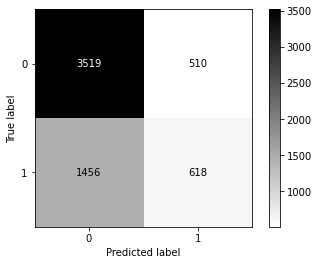

In [321]:
feature_utils.get_prediction_report(y_test_knn,knn_pred,[0,1],"KNN alone")

## Add KNN classifier to ensemble

In [360]:
def add_model_to_ensemble(pred_df,model,x):
    knn_label = model.predict(x)
    knn_proba = model.predict_proba(x) 
    pred_df['knn_proba_0']=knn_proba[:,0]
    pred_df['knn_proba_1']=knn_proba[:,1]
    return pred_df

In [361]:
pred_df_3 = add_model_to_ensemble(pred_df,knn,X_test_knn)

In [362]:
weights = np.asarray([0.7,0.1,0.2])
columns = ['crf','bert','knn']

In [391]:
pred_df_3 = recalc_avg(pred_df_3,weights,columns)

In [392]:
pred_df_3

,bert,crf,bert_proba_0,bert_proba_1,crf_proba_0,crf_proba_1,avg_prob_0,avg_prob_1,voted_label,bert0.8_crf0.2prob_0,bert0.8_crf0.2prob_1,bert0.8_crf0.2,knn_proba_0,knn_proba_1,crf0.7_bert0.1_knn0.2prob_0,crf0.7_bert0.1_knn0.2prob_1,crf0.7_bert0.1_knn0.2_prob_0,crf0.7_bert0.1_knn0.2_prob_1,crf0.7_bert0.1_knn0.2
0,0,not_nar,0.718448,0.281552,0.981550,0.018450,0.902619,0.097381,not_nar,0.797379,0.202621,not_nar,0.6,0.4,0.878930,0.121070,0.878930,0.121070,not_nar
1,0,not_nar,0.807705,0.192295,0.990942,0.009058,0.935971,0.064029,not_nar,0.862676,0.137324,not_nar,1.0,0.0,0.974430,0.025570,0.974430,0.025570,not_nar
2,0,not_nar,0.846506,0.153494,0.997356,0.002644,0.952101,0.047899,not_nar,0.891761,0.108239,not_nar,1.0,0.0,0.982800,0.017200,0.982800,0.017200,not_nar
3,1,is_nar,0.410462,0.589538,0.383633,0.616367,0.391682,0.608318,is_nar,0.402414,0.597586,is_nar,1.0,0.0,0.509589,0.490411,0.509589,0.490411,not_nar
4,1,is_nar,0.243487,0.756513,0.336836,0.663164,0.308831,0.691169,is_nar,0.271492,0.728508,is_nar,1.0,0.0,0.460134,0.539866,0.460134,0.539866,is_nar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6098,1,not_nar,0.421347,0.578653,0.968799,0.031201,0.804563,0.195436,not_nar,0.585583,0.414417,not_nar,0.8,0.2,0.880294,0.119706,0.880294,0.119706,not_nar
6099,0,not_nar,0.586311,0.413688,0.965671,0.034329,0.851863,0.148137,not_nar,0.700119,0.299881,not_nar,1.0,0.0,0.934601,0.065399,0.934601,0.065399,not_nar
6100,0,not_nar,0.747379,0.252621,0.952480,0.047520,0.890950,0.109050,not_nar,0.808909,0.191091,not_nar,0.8,0.2,0.901474,0.098526,0.901474,0.098526,not_nar
6101,0,not_nar,0.830255,0.169745,0.906428,0.093572,0.883576,0.116424,not_nar,0.853107,0.146894,not_nar,1.0,0.0,0.917525,0.082475,0.917525,0.082475,not_nar


crf0.7_bert0.1_knn0.2
              precision    recall  f1-score   support

     not_nar       0.71      0.78      0.74      4029
      is_nar       0.47      0.37      0.41      2074

    accuracy                           0.64      6103
   macro avg       0.59      0.58      0.58      6103
weighted avg       0.63      0.64      0.63      6103



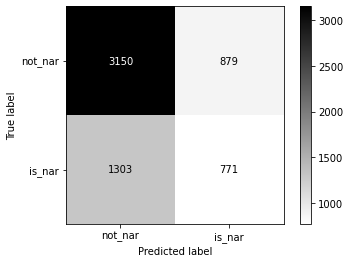

In [393]:
voted_col = "crf0.7_bert0.1_knn0.2"
y_pred_3 =pred_df_3[voted_col].tolist()
y_test_str = ['is_nar' if  i==1 else 'not_nar' for i in y_test_knn]
feature_utils.get_prediction_report(y_test_str,y_pred_3,['not_nar','is_nar'],voted_col)